In [13]:
# Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Name of the CSV file
data = 'final_sales_data.csv'

In [15]:
#Put into data frame
data_df = pd.read_csv(data)

In [16]:
data_df.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


The lower quartile of steel is: 194.975
The upper quartile of steel is: 233.55
The interquartile range of steel is: 38.57500000000002
The median of steel is: 213.8 
The mean of steel is: 216.75765306122446 
Values below 137.11249999999995 could be outliers.
Values above 291.4125 could be outliers.


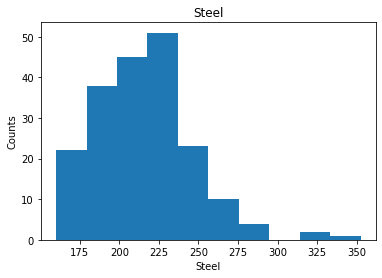

In [17]:
# Create empty list to fill 

steel = data_df["Steel_Price_Index"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = steel.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=data_df['Steel_Price_Index'].mean()

print(f"The lower quartile of steel is: {lowerq}")
print(f"The upper quartile of steel is: {upperq}")
print(f"The interquartile range of steel is: {iqr}")
print(f"The median of steel is: {quartiles[0.5]} ")
print(f"The mean of steel is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(data_df['Steel_Price_Index'])
plt.xlabel('Steel')
plt.ylabel('Counts')
plt.title('Steel')
plt.savefig('Images/Steel Histogram.png', dpi=100)
plt.show()

In [18]:
steel = data_df["Steel_Price_Index"].tolist()

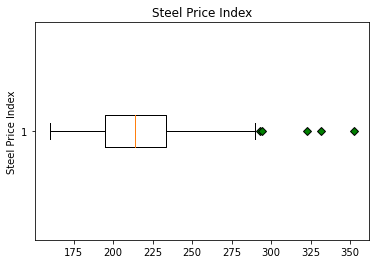

In [19]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Steel Price Index')
ax1.set_ylabel('Steel Price Index')
ax1.boxplot(steel, vert=False, flierprops=green_diamond)
plt.show()

In [20]:
# Determine outliers using upper and lower bounds
quartiles1 = data_df['Steel_Price_Index'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
steel_outliers=data_df[(data_df["Steel_Price_Index"]< lower_bound1) |
                                (data_df["Steel_Price_Index"]> upper_bound1)]
steel_outliers

137.11249999999995 - 291.4125


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
42,Jul-2008,2008,1126477.0,4.062,5.8,293.1,134.821,133.709
43,Aug-2008,2008,1240785.0,3.779,6.1,294.4,134.162,132.535
193,Apr-2021,2021,1493938.0,2.858,6.1,322.8,149.267,166.374
194,May-2021,2021,1502642.0,2.985,5.8,331.3,151.693,178.505
195,Jun-2021,2021,1352285.0,3.064,5.9,352.5,154.680,197.227


In [21]:
steel_wo_outliers=data_df[(data_df["Steel_Price_Index"]>= lower_bound1) &
                                (data_df["Steel_Price_Index"]<= upper_bound1)]
steel_wo_outliers

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.500,138.600
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.600,138.400
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.300,138.300
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.300,138.400
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.700,138.800
...,...,...,...,...,...,...,...,...
188,Nov-2020,2020,1199580.0,2.108,6.7,211.1,148.834,154.495
189,Dec-2020,2020,1597958.0,2.195,6.7,230.7,149.385,153.107
190,Jan-2021,2021,1174053.0,2.334,6.3,250.8,148.611,151.743
191,Feb-2021,2021,1256529.0,2.501,6.2,260.5,148.587,150.370


In [23]:
steel_wo_outliers.describe()

,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
count,191.000000,1.910000e+02,191.000000,191.000000,191.000000,191.000000,191.000000
mean,2012.643979,1.279391e+06,2.766513,6.178010,214.085864,142.646298,142.035864
std,4.699267,2.365748e+05,0.554424,2.079863,26.429996,4.912613,7.017679
min,2005.000000,6.506080e+05,1.687000,3.500000,160.000000,132.069000,121.887000
25%,2009.000000,1.140029e+06,2.302000,4.600000,194.400000,137.741000,138.095500
50%,2013.000000,1.313000e+06,2.705000,5.300000,212.900000,145.378000,140.747000
75%,2017.000000,1.469338e+06,3.191000,7.850000,232.850000,146.810000,148.547500
max,2021.000000,1.795944e+06,4.054000,13.300000,289.600000,149.385000,156.658000


In [24]:
steel_wo_outliers.to_csv("final_steel_data.csv",encoding="utf-8", index=False, header=True)